In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#it helps to customize the appearance of plots by setting various visual parameters
sns.set()

df = pd.read_csv("games.csv")

In [379]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [380]:
###dataset has rating of both players, we can make new column which that show us the average rating of games
df["average_rating"] = ( df["white_rating"]+ df["black_rating"])/2

In [381]:
df.head(2)
#we can see the average_rating column

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,average_rating
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5


In [382]:
df.average_rating.describe()

count    20058.000000
mean      1592.731927
std        263.173825
min        816.500000
25%       1406.500000
50%       1568.750000
75%       1771.000000
max       2475.500000
Name: average_rating, dtype: float64

In [383]:
def set_limits(x):
    for n in range(700, 3001, 100):
        if x <= n:
            return f"{n - 100} - {n}"

df["rating_bracket"] = df["average_rating"].apply(brackets)

In [384]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,average_rating,rating_bracket
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1345.5,1300 - 1400
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,1200 - 1300
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,1400 - 1500
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1446.5,1400 - 1500
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1496.0,1400 - 1500


In [385]:
df.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
average_rating    float64
rating_bracket     object
dtype: object

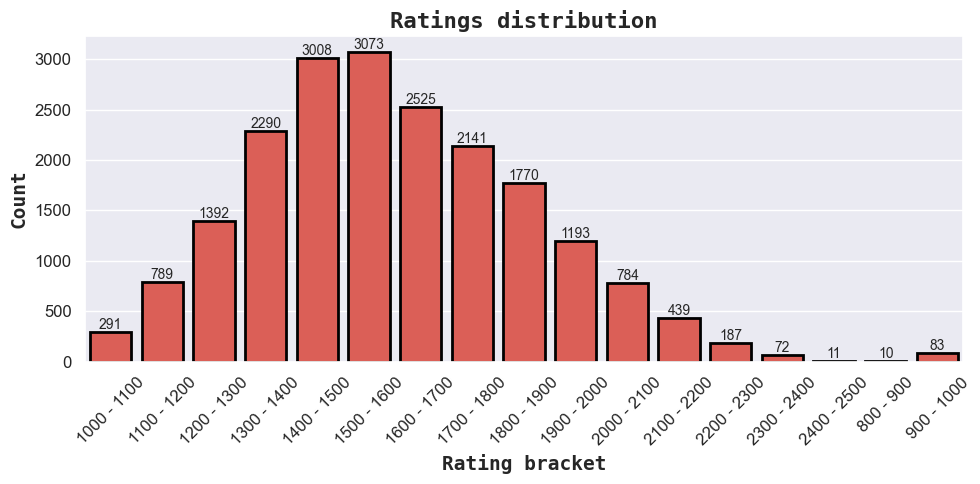

In [386]:
rating_counts = df["rating_bracket"].value_counts().sort_index()
sns.set_palette("hls")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, edgecolor='black', linewidth=2, saturation=1.5)
for bar, count in zip(ax.patches, rating_counts.values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f'{count}', ha='center', va='bottom', fontsize=10)

plt.title('Ratings distribution', fontname='monospace', weight='bold', fontsize=16)
plt.xlabel("Rating bracket", fontname='monospace', weight='semibold', fontsize=14)
plt.ylabel("Count", fontname='monospace', weight='semibold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\recep\AppData\Local\Temp\ipykernel_15684\2251379045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x=mean_turns_by_rating.index, y=mean_turns_by_rating.values, palette=custom_palette,


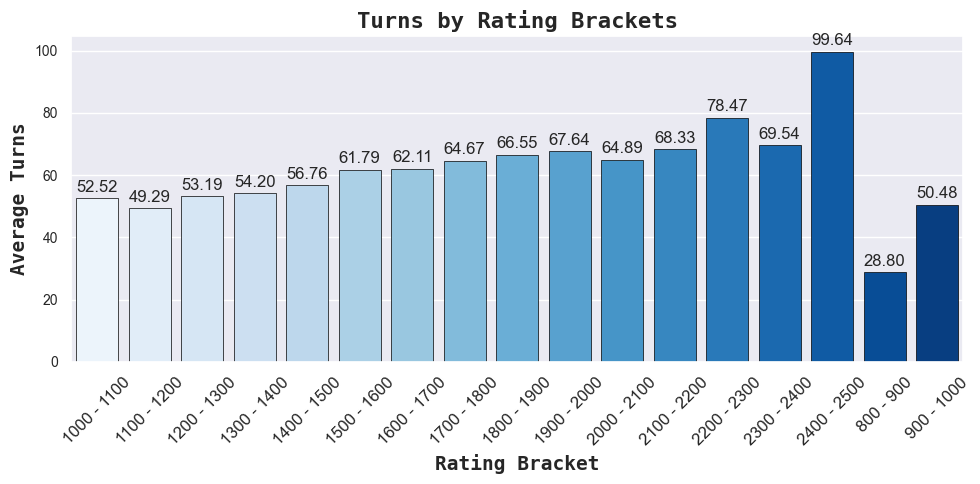

In [387]:
plt.figure(figsize=(10, 5))
custom_palette = sns.color_palette("Blues", len(df["rating_bracket"].unique()))

mean_turns_by_rating = df.groupby("rating_bracket")["turns"].mean()

plots = sns.barplot(x=mean_turns_by_rating.index, y=mean_turns_by_rating.values, palette=custom_palette,
                    edgecolor='black', linewidth=0.5, saturation=1.5)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center', size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Turns by Rating Brackets', fontname='monospace', weight='bold', fontsize=16)
plt.xlabel("Rating Bracket", fontname='monospace', weight='semibold', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.ylabel("Average Turns", fontname='monospace', weight='semibold', fontsize=14)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [388]:
print("Number of Openings: ", len(df['opening_name'].value_counts()))
print("Total Count       : ", df['opening_name'].value_counts().sum())

Number of Openings:  1477
Total Count       :  20058


In [389]:
#We can see the all opneing names
for opening in sorted(df['opening_name']):
    print(opening)

Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense
Alekhine Defense #2
Alekhine Defense #2
Alekhine Defense #2
Alekhine Defense #3
Alekhine Defense: Balogh Variation
Alekhine Defense: Brooklyn Variation
Alekhine Defense: Brooklyn Variation
Alekhine Defense: Exchange Va

In [390]:
print("Number of Openings: ", len(df['opening_name'].value_counts()))
print("Total Count       : ", df['opening_name'].value_counts().sum())

Number of Openings:  1477
Total Count       :  20058


In [391]:
df["opening_name"].replace("Queen's Gambit Refused", "Queen's Gambit Declined", inplace = True)

df["opening_name"].replace("King's Pawn Game", "King's Pawn", inplace = True)
df["opening_name"].replace("King's Pawn Opening", "King's Pawn", inplace = True)

df["opening_name"].replace("Old Indian Defense", "Old Indian", inplace = True)
df["opening_name"].replace("Queen's Pawn Game", "Queen's Pawn", inplace = True)

df["opening_name"].replace("Queen's Pawn Opening", "Queen's Pawn", inplace = True)

df["opening_name"].replace("Ware Defense", "Ware Opening", inplace = True)

In [392]:
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(":")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" |")[0])
df["opening_name"] = df["opening_name"].apply(lambda x: x.split(" #")[0])

In [393]:
print("Number of Openings: ", len(df['opening_name'].value_counts()))
print("Total Count       : ", df['opening_name'].value_counts().sum())

Number of Openings:  142
Total Count       :  20058


In [394]:
opening_counts = df['opening_name'].value_counts()
df2 = df[df['opening_name'].isin(opening_counts[opening_counts > 100].index)]

In [395]:
df2['opening_name'].value_counts()

opening_name
Sicilian Defense           2632
French Defense             1412
Queen's Pawn Game          1091
Italian Game                981
King's Pawn Game            861
Ruy Lopez                   858
English Opening             720
Scandinavian Defense        716
Philidor Defense            691
Caro-Kann Defense           597
Scotch Game                 465
Queen's Gambit Declined     394
Four Knights Game           370
Van't Kruijs Opening        368
Zukertort Opening           336
Bishop's Opening            323
Indian Game                 319
Pirc Defense                288
Queen's Pawn                271
Queen's Gambit Accepted     253
Russian Game                252
Queen's Gambit Refused      251
Slav Defense                240
Modern Defense              225
Nimzowitsch Defense         224
Horwitz Defense             209
King's Indian Defense       197
Alekhine Defense            192
King's Knight Opening       183
Hungarian Opening           179
Owen Defense               

In [396]:
print(len(df2['opening_name'].value_counts()))
print(df2['opening_name'].value_counts().sum())

42
17748


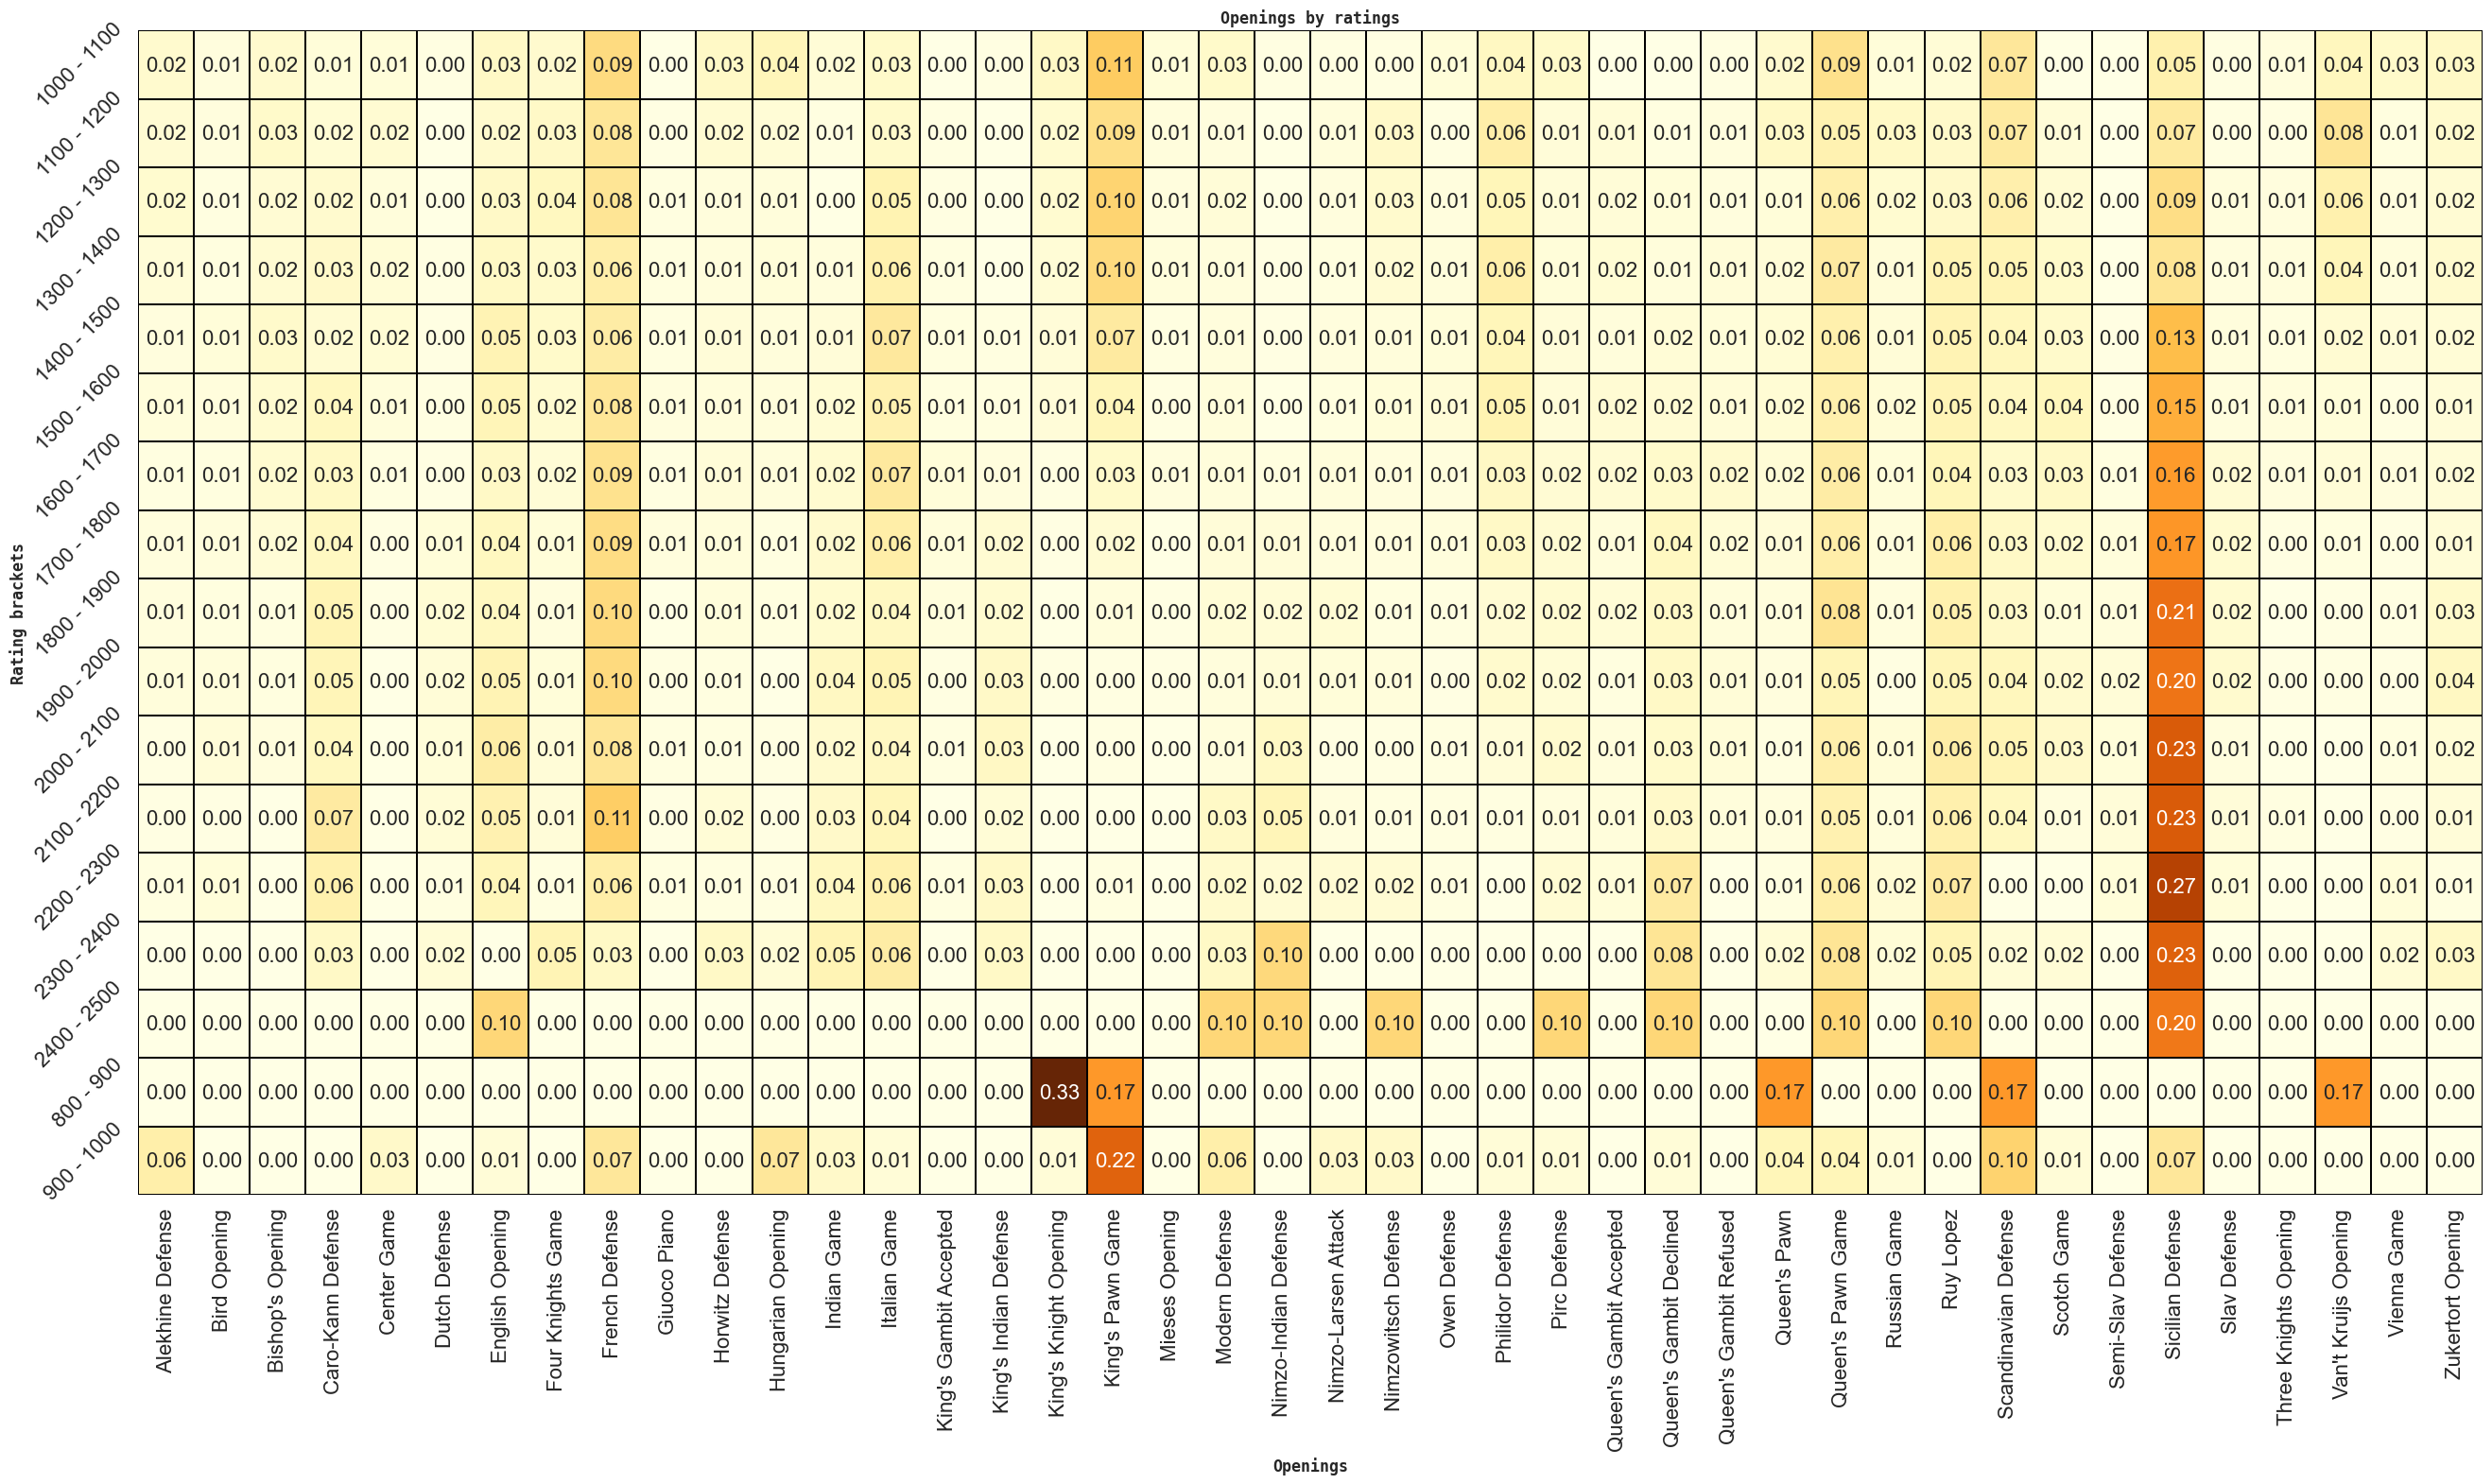

In [397]:
z = df2.groupby(["rating_bracket", "opening_name"]).size().unstack().fillna(0).astype(int)
fig, ax = plt.subplots(figsize=(32, 16))

sns.heatmap(z.apply(lambda x: x/x.sum(), axis=1), xticklabels=True, yticklabels=True, cmap='YlOrBr',
        annot=True, linewidths=0.005, linecolor='black', annot_kws={"fontsize":16}, fmt='.2f', cbar=False)

plt.title('Openings by ratings', fontname = 'monospace', weight='bold')
plt.xticks(fontsize = 16)
plt.xlabel("Openings", fontname = 'monospace', weight='semibold')
plt.yticks(fontsize=16, rotation = 45)
plt.ylabel("Rating brackets", fontname = 'monospace', weight='semibold')
plt.show()
del z


In [398]:
df3 = df.groupby(["rating_bracket", "winner"]).size().unstack(fill_value=0)
df3 = df3.div(df3.sum(axis=1), axis=0)
df3 = (df3 * 100).round(2)

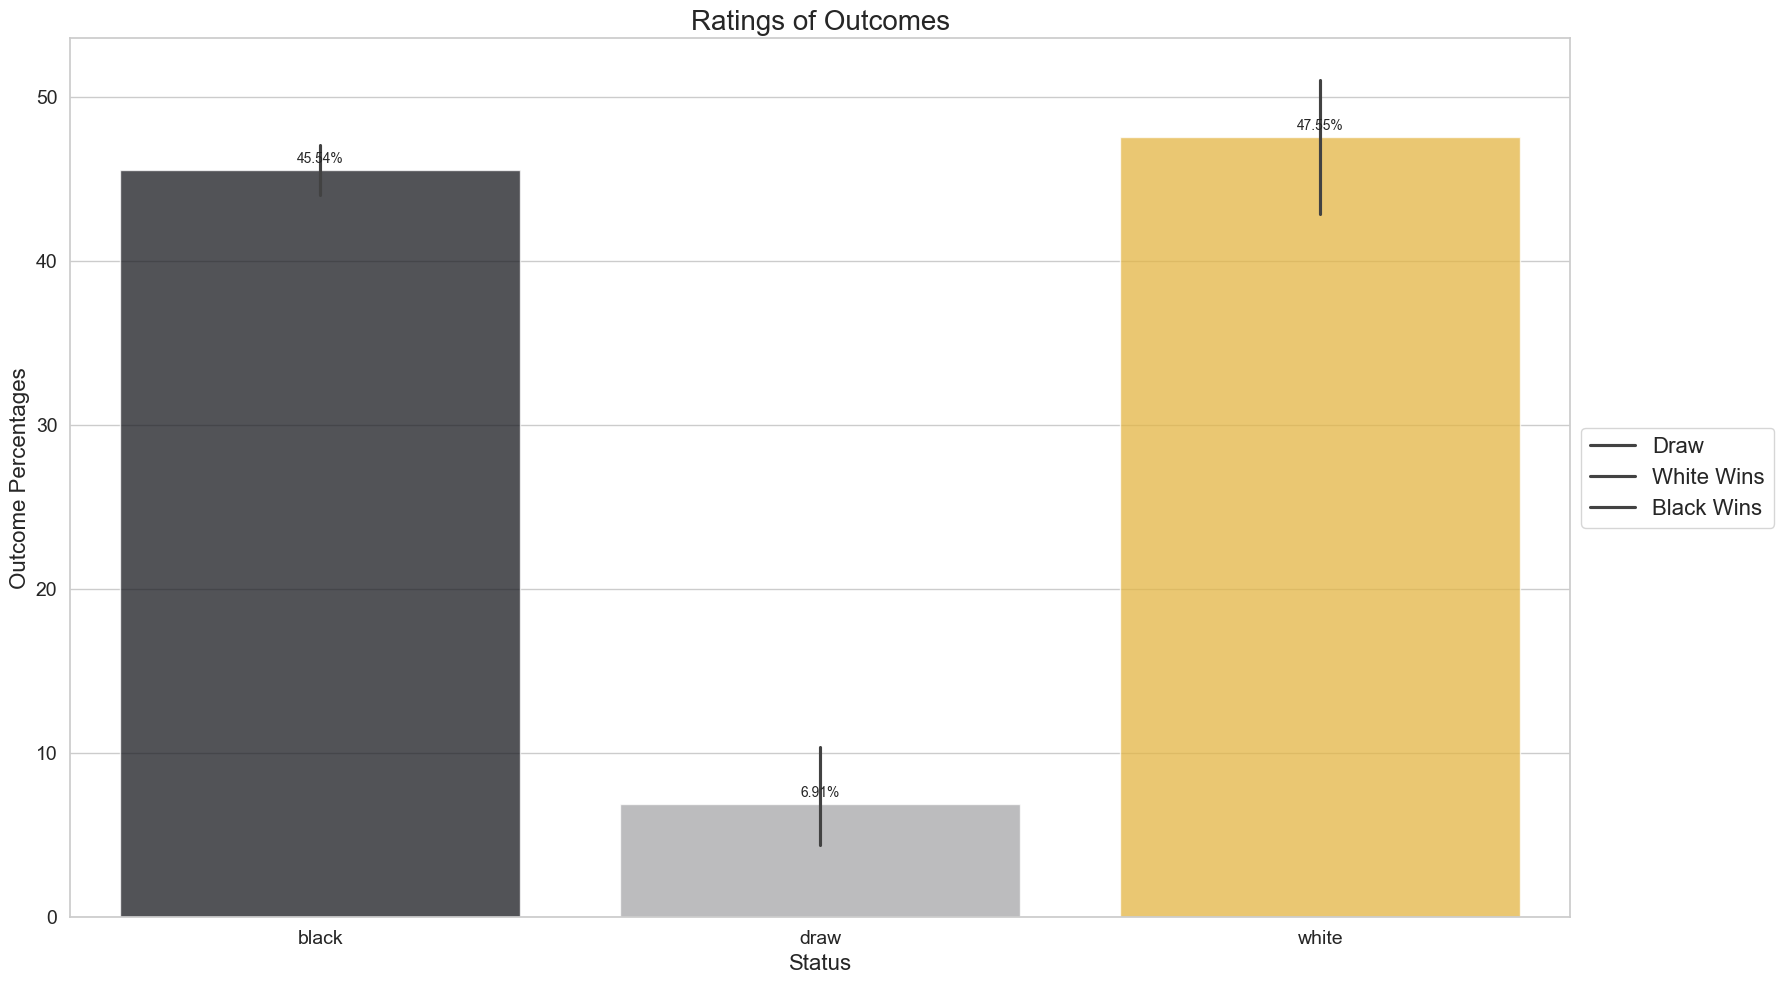

In [399]:
plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")

sns.barplot(data=df3, alpha=0.75, palette=['#171820', '#a6a6a8', '#fdc029'])
for ax in plt.gcf().axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, xytext=(0, 8), textcoords='offset points')
        
plt.title("Ratings of Outcomes", fontsize=20)
plt.xlabel("Status", fontsize=16)
plt.ylabel("Outcome Percentages", fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.legend(["Draw", "White Wins", "Black Wins"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.tight_layout()
plt.show()


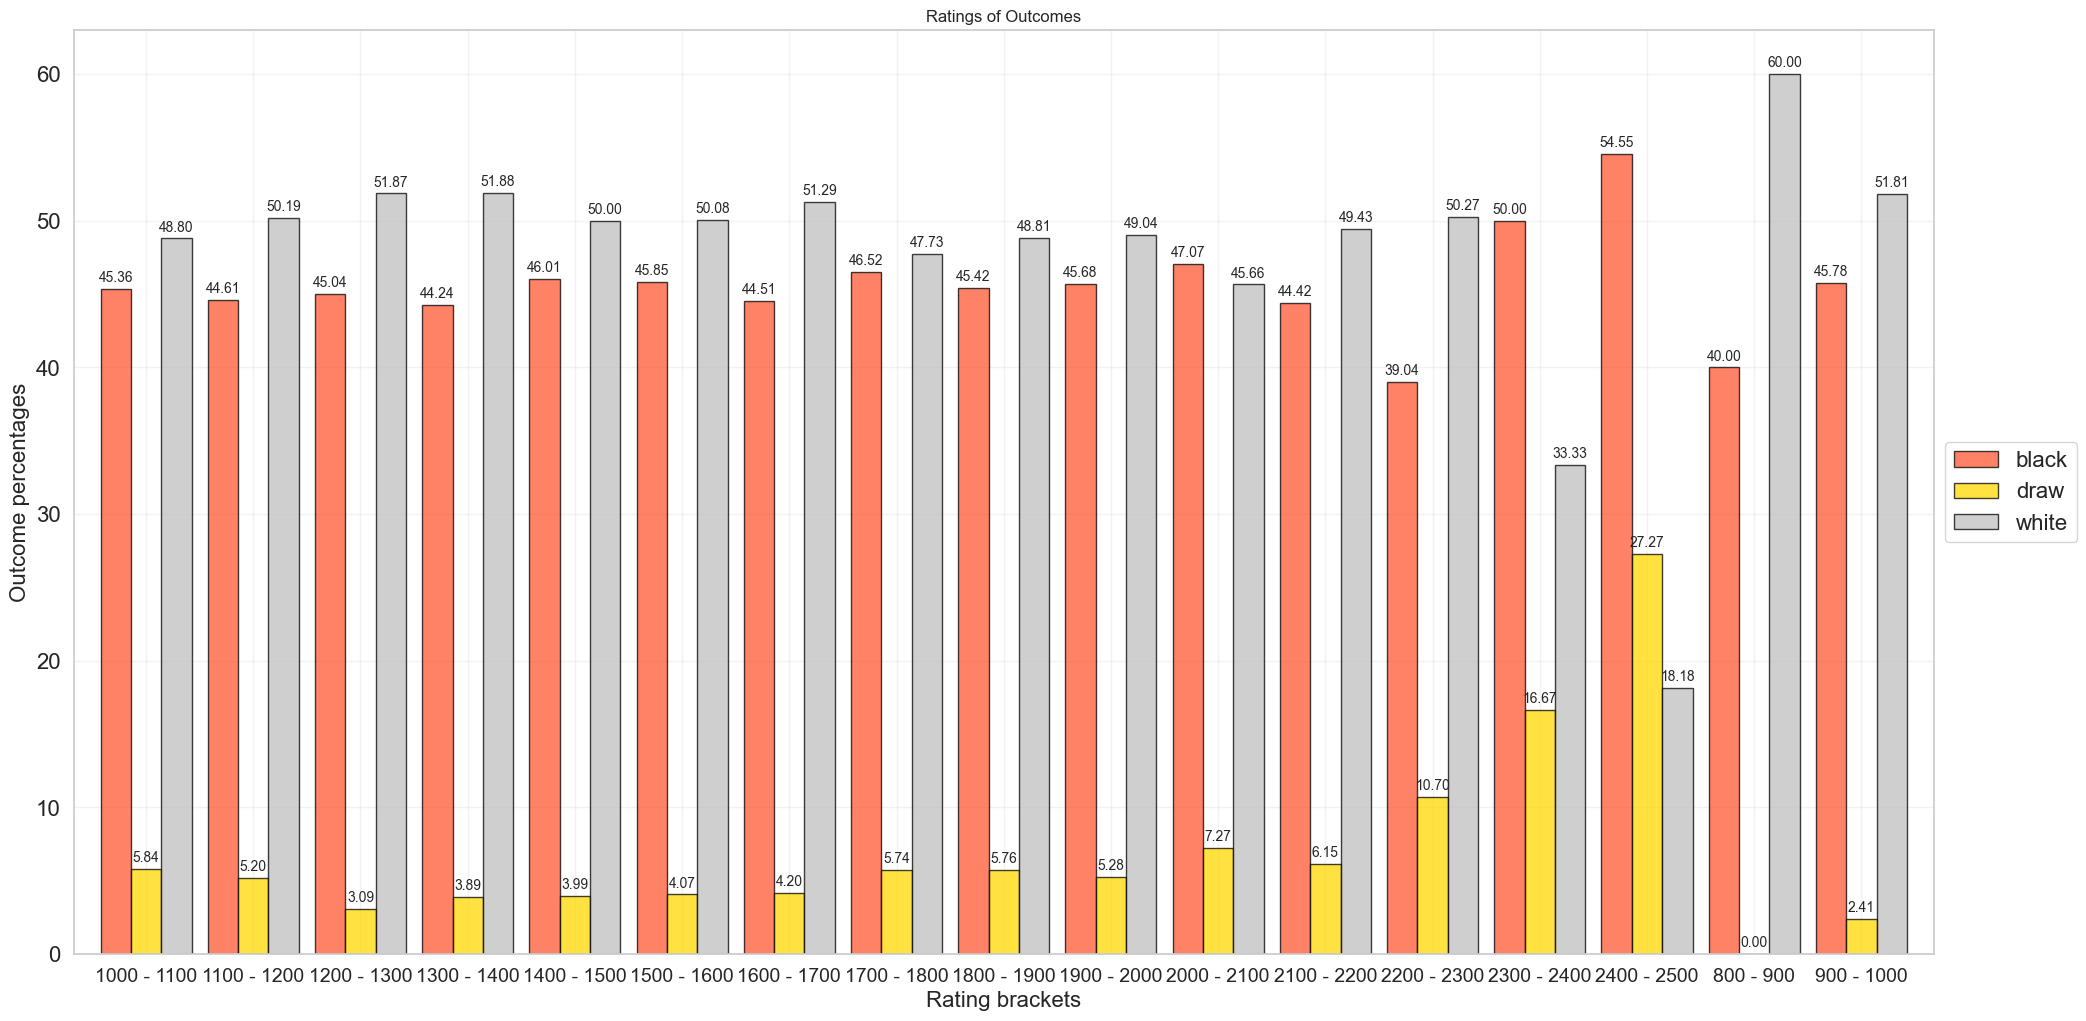

In [400]:
plots = df3.plot(kind = "bar", alpha=0.75, color=['#FF5733', '#FFD700', '#C0C0C0'], figsize = (24, 12),
    width = 0.85, title = "Ratings of Outcomes", edgecolor = "black")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plots.grid(alpha = 0.25)    
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 16})
plt.xlabel("Rating brackets", fontsize = 16)
plt.xticks(fontsize = 14, rotation = 0)
plt.ylabel("Outcome percentages", fontsize = 16)
plt.yticks(fontsize=16)
plt.show()

In [401]:
df2.groupby("opening_name")["turns"].mean()

opening_name
Alekhine Defense           58.359375
Bird Opening               55.114650
Bishop's Opening           55.433437
Caro-Kann Defense          64.613065
Center Game                54.170588
Dutch Defense              60.720000
English Opening            62.840278
Four Knights Game          61.545946
French Defense             61.223796
Giuoco Piano               58.194444
Horwitz Defense            58.722488
Hungarian Opening          63.212291
Indian Game                65.673981
Italian Game               57.477064
King's Gambit Accepted     54.661654
King's Indian Defense      70.756345
King's Knight Opening      52.049180
King's Pawn Game           56.580720
Mieses Opening             50.718447
Modern Defense             65.320000
Nimzo-Indian Defense       66.662420
Nimzo-Larsen Attack        63.176829
Nimzowitsch Defense        56.995536
Owen Defense               57.754386
Philidor Defense           63.037627
Pirc Defense               59.791667
Queen's Gambit Accepted  

In [402]:
mean_turns_by_opening = df2.groupby("opening_name")["turns"].mean()
mean_turns_by_opening_sorted = mean_turns_by_opening.sort_values(ascending=False)
mean_turns_by_opening_sorted

opening_name
King's Indian Defense      70.756345
Semi-Slav Defense          69.518519
Nimzo-Indian Defense       66.662420
Queen's Gambit Declined    65.939086
Indian Game                65.673981
Queen's Pawn Game          65.414299
Modern Defense             65.320000
Caro-Kann Defense          64.613065
Slav Defense               64.183333
Ruy Lopez                  63.393939
Hungarian Opening          63.212291
Nimzo-Larsen Attack        63.176829
Philidor Defense           63.037627
English Opening            62.840278
Sicilian Defense           62.786094
Vienna Game                61.868613
Four Knights Game          61.545946
French Defense             61.223796
Dutch Defense              60.720000
Queen's Gambit Accepted    59.881423
Pirc Defense               59.791667
Three Knights Opening      59.538462
Queen's Gambit Refused     58.960159
Horwitz Defense            58.722488
Zukertort Opening          58.446429
Alekhine Defense           58.359375
Giuoco Piano             

In [403]:
df2.groupby("opening_name")["turns"].mean().index

Index(['Alekhine Defense', 'Bird Opening', 'Bishop's Opening',
       'Caro-Kann Defense', 'Center Game', 'Dutch Defense', 'English Opening',
       'Four Knights Game', 'French Defense', 'Giuoco Piano',
       'Horwitz Defense', 'Hungarian Opening', 'Indian Game', 'Italian Game',
       'King's Gambit Accepted', 'King's Indian Defense',
       'King's Knight Opening', 'King's Pawn Game', 'Mieses Opening',
       'Modern Defense', 'Nimzo-Indian Defense', 'Nimzo-Larsen Attack',
       'Nimzowitsch Defense', 'Owen Defense', 'Philidor Defense',
       'Pirc Defense', 'Queen's Gambit Accepted', 'Queen's Gambit Declined',
       'Queen's Gambit Refused', 'Queen's Pawn', 'Queen's Pawn Game',
       'Russian Game', 'Ruy Lopez', 'Scandinavian Defense', 'Scotch Game',
       'Semi-Slav Defense', 'Sicilian Defense', 'Slav Defense',
       'Three Knights Opening', 'Van't Kruijs Opening', 'Vienna Game',
       'Zukertort Opening'],
      dtype='object', name='opening_name')

In [404]:
df5 = df2.groupby(["winner", "opening_name"]).size().unstack().fillna(0).astype(int)
df5 = df5.div(df5.sum(axis=0), axis=1).mul(100).round(2).transpose()
df5 = df5.reindex(['Alekhine Defense', 'Bird Opening', "Bishop's Opening",
       'Caro-Kann Defense', 'Center Game', 'Dutch Defense', 'English Opening',
       'Four Knights Game', 'French Defense', 'Giuoco Piano',
       'Horwitz Defense', 'Hungarian Opening', 'Indian Game', 'Italian Game',
       "King's Gambit Accepted", "King's Indian Defense",
       "King's Knight Opening", "King's Pawn", 'Mieses Opening',
       'Modern Defense', 'Nimzo-Indian Defense', 'Nimzo-Larsen Attack',
       'Nimzowitsch Defense', 'Owen Defense', 'Philidor Defense',
       'Pirc Defense', "Queen's Gambit Accepted", "Queen's Gambit Declined",
       "Queen's Pawn", 'Russian Game', 'Ruy Lopez', 'Scandinavian Defense',
       'Scotch Game', 'Semi-Slav Defense', 'Sicilian Defense', 'Slav Defense',
       'Three Knights Opening', "Van't Kruijs Opening", 'Vienna Game',
       'Zukertort Opening'])

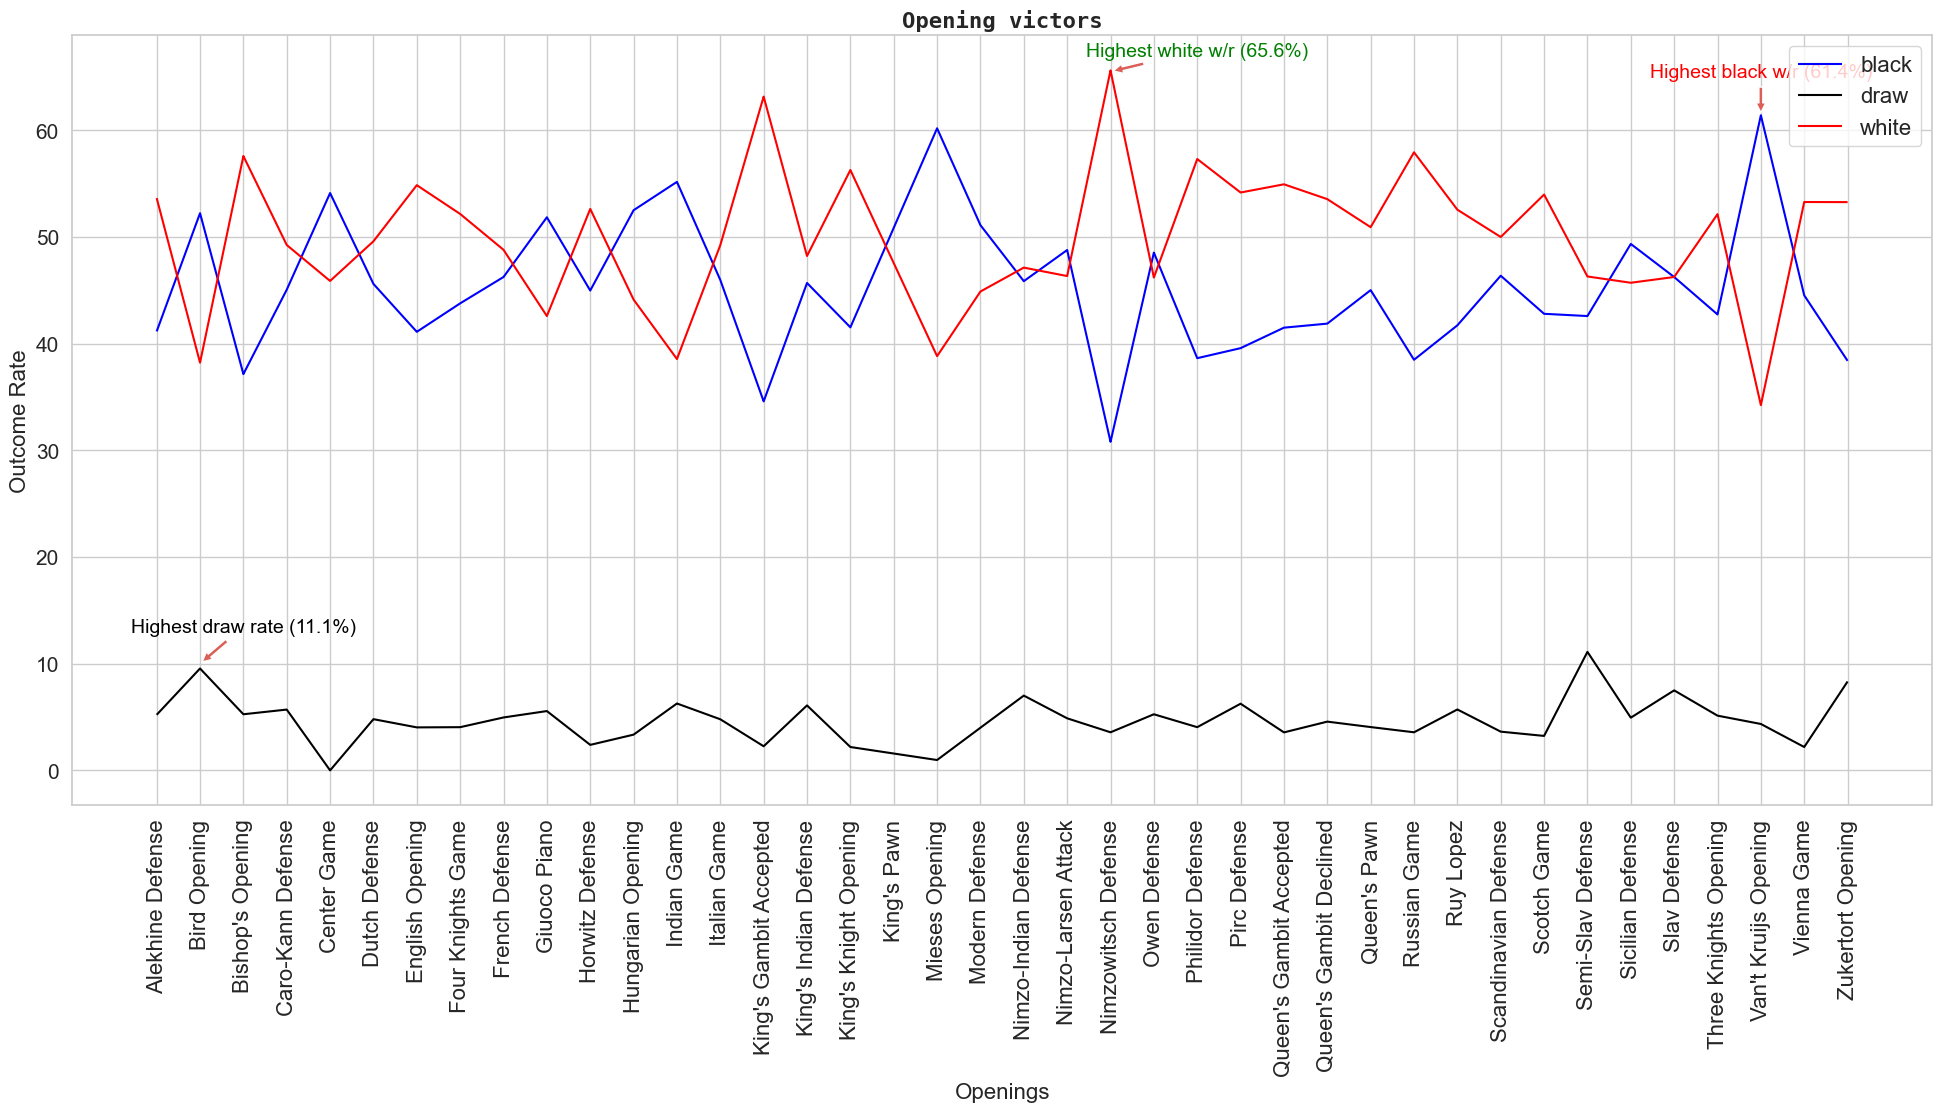

In [405]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data=df5, palette=['blue', 'black', 'red'], dashes=[(1, 0), (1, 0), (1, 0)], sort=False)

# Metinleri vurgulamak için "*" sembolü kullanma
plt.annotate("Highest black w/r (61.4%)", xy=(37, 61.4), xytext=(37, 65), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple', lw=1), fontsize=14, color='red')
plt.annotate("Highest draw rate (11.1%)", xy=(1, 10), xytext=(2, 13), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple', lw=1), fontsize=14, color='black')
plt.annotate("Highest white w/r (65.6%)", xy=(22, 65.5), xytext=(24, 67), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple', lw=1), fontsize=14, color='green')

plt.title('Opening victors', fontname='monospace', weight='bold', fontsize=16)
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize=16)
plt.xticks(fontsize=16, rotation=90)
plt.ylabel("Outcome Rate", fontsize=16)
plt.yticks(fontsize=15)

plt.show()


In [406]:
df2["victory_status"].value_counts()

victory_status
resign       9895
mate         5580
outoftime    1477
draw          796
Name: count, dtype: int64

In [407]:
df6 = df2.groupby(["victory_status", "opening_name"]).size().unstack().fillna(0).astype(int)
df6 = df6.div(df5.sum(axis=0), axis=1).mul(100).round(2).transpose()
df6 = df6.reindex(['Alekhine Defense', 'Bird Opening', "Bishop's Opening",
       'Caro-Kann Defense', 'Center Game', 'Dutch Defense', 'English Opening',
       'Four Knights Game', 'French Defense', 'Giuoco Piano',
       'Horwitz Defense', 'Hungarian Opening', 'Indian Game', 'Italian Game',
       "King's Gambit Accepted", "King's Indian Defense",
       "King's Knight Opening", "King's Pawn", 'Mieses Opening',
       'Modern Defense', 'Nimzo-Indian Defense', 'Nimzo-Larsen Attack',
       'Nimzowitsch Defense', 'Owen Defense', 'Philidor Defense',
       'Pirc Defense', "Queen's Gambit Accepted", "Queen's Gambit Declined",
       "Queen's Pawn", 'Russian Game', 'Ruy Lopez', 'Scandinavian Defense',
       'Scotch Game', 'Semi-Slav Defense', 'Sicilian Defense', 'Slav Defense',
       'Three Knights Opening', "Van't Kruijs Opening", 'Vienna Game',
       'Zukertort Opening'])

C:\Users\recep\AppData\Local\Temp\ipykernel_15684\4166286982.py:2: UserWarning: The dashes list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(data = df5, palette=['blue', 'black', 'red'], dashes=[(1, 0), (1, 0), (1, 0), (1, 0)],


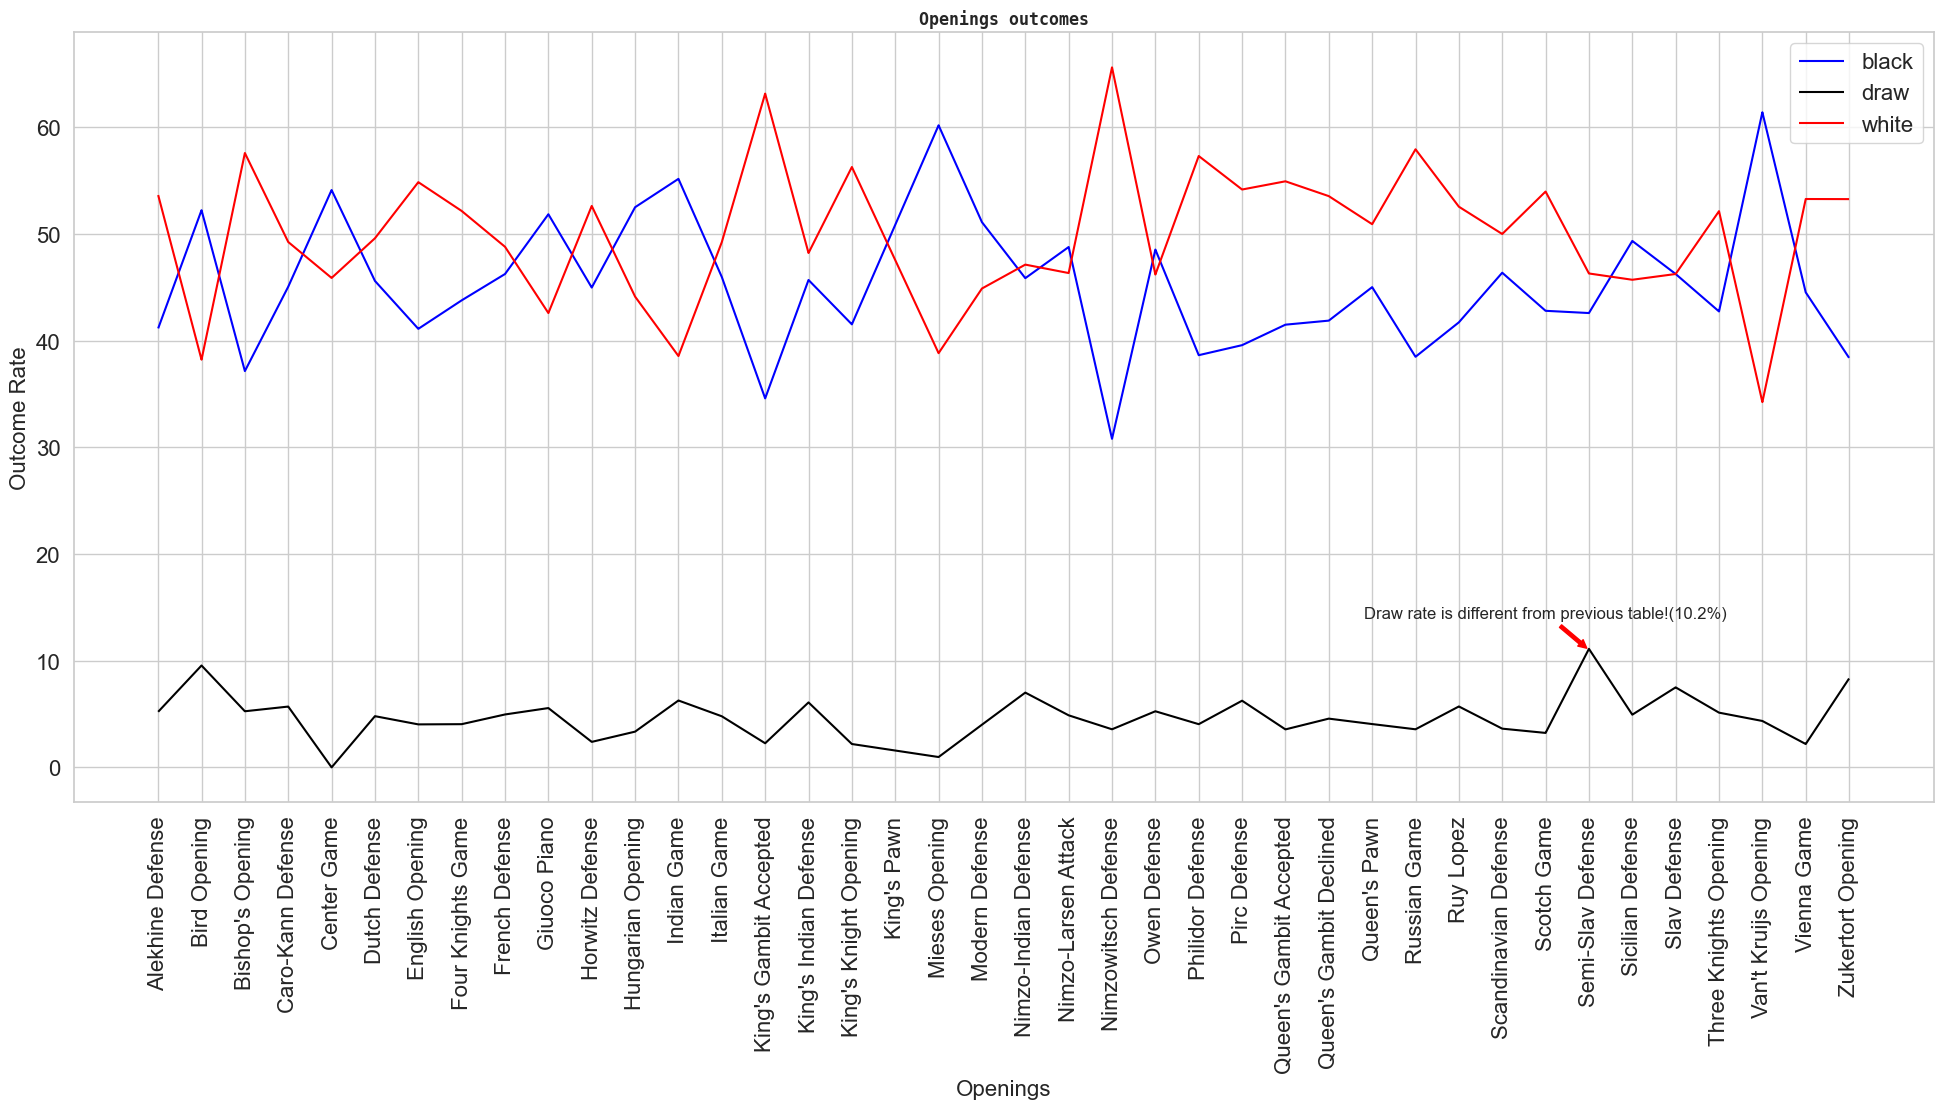

In [408]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.lineplot(data = df5, palette=['blue', 'black', 'red'], dashes=[(1, 0), (1, 0), (1, 0), (1, 0)],
            sort = False)

plt.annotate("Draw rate is different from previous table!(10.2%)", xy=(33,11), xytext=(32,14), horizontalalignment="center",
             arrowprops=dict(arrowstyle='simple',lw=1, color='red') )

plt.title('Openings outcomes', 
          fontname = 'monospace', weight='bold')
plt.legend(prop={'size': 16})
plt.xlabel("Openings", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 90)
plt.ylabel("Outcome Rate", fontsize = 16)
plt.yticks(fontsize=16)

plt.show()

In [409]:
df2[(df2["winner"] == "draw") & (df2["victory_status"] != "draw")]
len(df2[(df2["winner"] == "draw") & (df2["victory_status"] != "draw")])

42